This data set contains records related to red and white variants of the Portuguese Vinho Verde wine. It contains information from 1599 red wine samples and 4898 white wine samples. Input variables in the data set consist of the type of wine (either red or white wine) and metrics from objective tests (e.g. acidity levels, PH values, ABV, etc.), while the target/output variable is a numerical score based on sensory data—median of at least 3 evaluations made by wine experts. Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Due to privacy and logistic issues, there is no data about grape types, wine brand, and wine selling price.



# Data set details

1 - type of wine: type of wine (categorical: 'red', 'white')

(continuous variables based on physicochemical tests)

2 - fixed acidity: The acids that naturally occur in the grapes used to ferment the wine and carry over into the wine. They mostly consist of tartaric, malic, citric or succinic acid that mostly originate from the grapes used to ferment the wine. They also do not evaporate easily. (g / dm^3)

3 - volatile acidity: Acids that evaporate at low temperatures—mainly acetic acid which can lead to an unpleasant, vinegar-like taste at very high levels. (g / dm^3)

4 - citric acid: Citric acid is used as an acid supplement which boosts the acidity of the wine. It's typically found in small quantities and can add 'freshness' and flavor to wines. (g / dm^3)

5 - residual sugar: The amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/liter. Wines residual sugar level greater than 45 grams/liter are considered sweet. On the other end of the spectrum, a wine that does not taste sweet is considered as dry. (g / dm^3)

6 - chlorides: The amount of chloride salts (sodium chloride) present in the wine. (g / dm^3)

7 - free sulfur dioxide: The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. All else constant, the higher the free sulfur dioxide content, the stronger the preservative effect. (mg / dm^3)

8 - total sulfur dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (mg / dm^3)

9 - density: The density of wine juice depending on the percent alcohol and sugar content; it's typically similar but higher than that of water (wine is 'thicker'). (g / cm^3)

10 - pH: A measure of the acidity of wine; most wines are between 3-4 on the pH scale. The lower the pH, the more acidic the wine is; the higher the pH, the less acidic the wine. (The pH scale technically is a logarithmic scale that measures the concentration of free hydrogen ions floating around in your wine. Each point of the pH scale is a factor of 10. This means a wine with a pH of 3 is 10 times more acidic than a wine with a pH of 4)

11 - sulphates: Amount of potassium sulphate as a wine additive which can contribute to sulfur dioxide gas (S02) levels; it acts as an antimicrobial and antioxidant agent.(g / dm3)

12 - alcohol: How much alcohol is contained in a given volume of wine (ABV). Wine generally contains between 5–15% of alcohols. (% by volume)

Output variable:

13 - quality: score between 0 (very bad) and 10 (very excellent) by wine experts



## Objective

So much about wine making remains elusive—taste is very subjective, making it extremely challenging to predict exactly how consumers will react to a certain bottle of wine. There is no doubt that winemakers, connoisseurs, and scientists have greatly contributed their expertise to the process, but there is still more to be discovered about the art and science of winemaking. Using this data to gain a better understanding of what makes a good quality or bad quality wine according to wine experts' taste-buds and brains. The emphasis is given to exploratory data analysis and various hypothesis testing is accomplished to make out infrences from the data. There are other attributes like price and brand that are not present in the data due to privacy concern. Main empahisis is offered to find out the chemicals which increased the quality of wine. Knowing these variable or
chemical which directly link to quality would definitely help the wine maker to improve the quality of wine.


### importing libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
import plotly.graph_objects as go

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scikit_posthocs

In [224]:
from plotly import express as px

In [158]:
from itertools import combinations

In [159]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [26]:
data.shape

(5295, 13)

In [160]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [161]:
data.select_dtypes(include=object).describe()

,type
count,6497
unique,2
top,white
freq,4898


In [163]:
data.duplicated().sum() # data contains duplicated values

1168

In [164]:
data.drop_duplicates(inplace=True) # dropping duplicated values
data.reset_index(inplace=True,drop=True)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [165]:
data.shape

(5329, 13)

In [166]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [167]:
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [168]:
data.shape

(5295, 13)

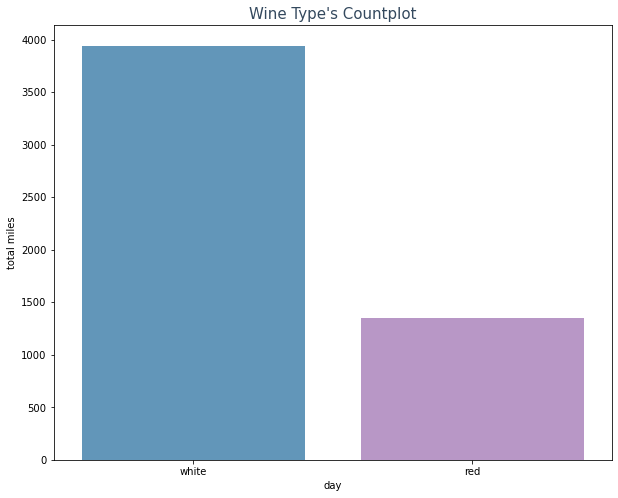

In [169]:
plt.figure(figsize=(10,8))
colors = ["#5499C7", "#BB8FCE"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(x=data['type'])
# Customize the axes and title
ax.set_title("Wine Type's Countplot" ,fontdict={"size":15,'color':'#34495E'})
ax.set_xlabel("day")
ax.set_ylabel("total miles")
plt.show()

In [170]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

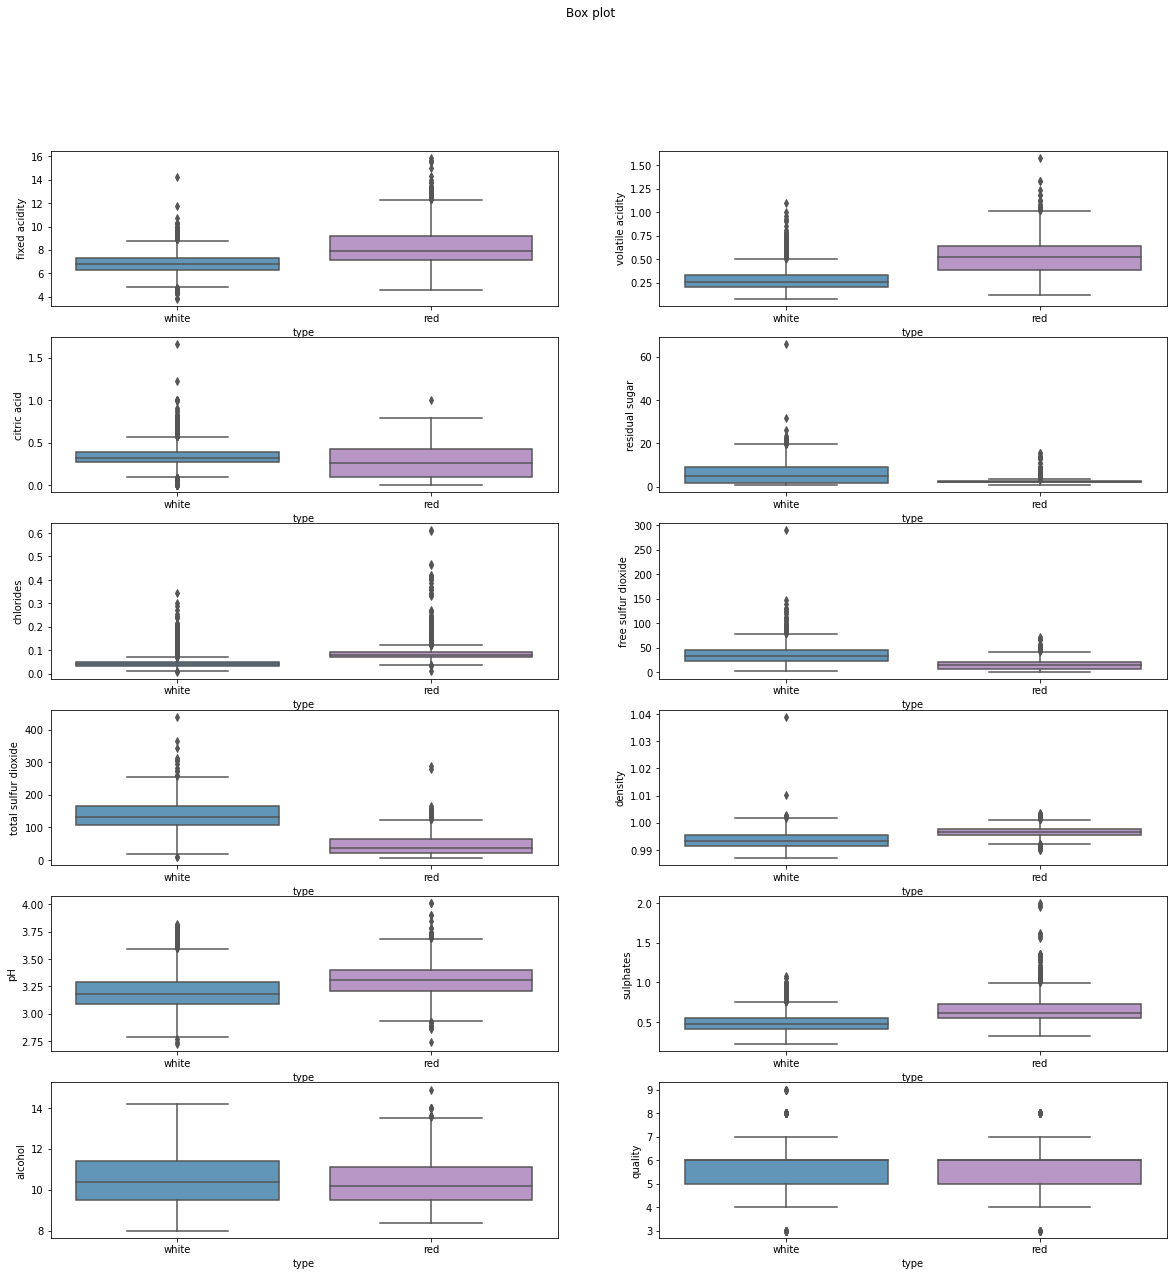

In [171]:
fig, axes = plt.subplots(6, 2, sharex=False, figsize=(20,20))
fig.suptitle('Box plot')
sns.boxplot(ax=axes[0,0],x=data['type'],y=data['fixed acidity'])

sns.boxplot(ax=axes[0,1],x=data['type'],y=data['volatile acidity'])

sns.boxplot(ax=axes[1,0],x=data['type'],y=data['citric acid'])

sns.boxplot(ax=axes[1,1],x=data['type'],y=data['residual sugar'])

sns.boxplot(ax=axes[2,0],x=data['type'],y=data['chlorides'])
sns.boxplot(ax=axes[2,1],x=data['type'],y=data['free sulfur dioxide'])
sns.boxplot(ax=axes[3,0],x=data['type'],y=data['total sulfur dioxide'])
sns.boxplot(ax=axes[3,1],x=data['type'],y=data['density'])
sns.boxplot(ax=axes[4,0],x=data['type'],y=data['pH'])
sns.boxplot(ax=axes[4,1],x=data['type'],y=data['sulphates'])
sns.boxplot(ax=axes[5,0],x=data['type'],y=data['alcohol'])
sns.boxplot(ax=axes[5,1],x=data['type'],y=data['quality'])
plt.show()

From above graph it is clear that quality of wine appear almosst same for the red and white wine, we will test it further
we the hypothesis. The outliers are present in the data , there is a very chance that the outlier may provide us some insight
about the high quality of wine. 

median pd value of red wine is more than white wine but exception are presetn in both wine's classes

Fixed acidity and volatile acidity both are high for the red wine compare to white wine

median citric acid content is hight in case of white wine , but red wine shows large variation for citric acid

Density of red wine is high but total sulphur dioxide content for the white wine is high.



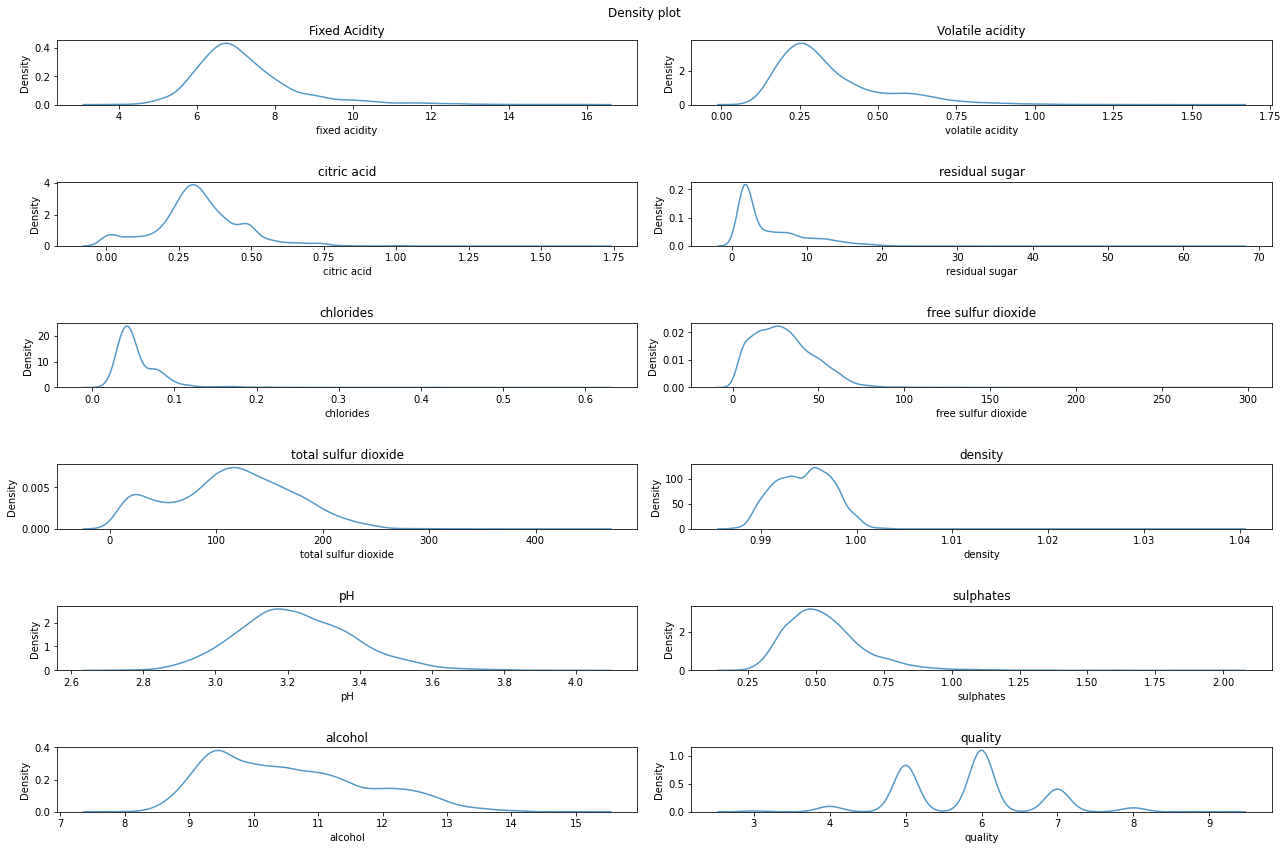

In [240]:
fig, axes = plt.subplots(6, 2, sharex=False, figsize=(18,12))
fig.suptitle('Density plot')
a1 =sns.kdeplot(ax=axes[0,0],x=data['fixed acidity'])
a1.set_title('Fixed Acidity')

a2=sns.kdeplot(ax=axes[0,1],x=data['volatile acidity'])
a2.set_title("Volatile acidity")

a3 =sns.kdeplot(ax=axes[1,0],x=data['citric acid'])
a3.set_title('citric acid')

a4=sns.kdeplot(ax=axes[1,1],x=data['residual sugar'])
a4.set_title('residual sugar')

a5=sns.kdeplot(ax=axes[2,0],x=data['chlorides'])
a5.set_title('chlorides')

a6=sns.kdeplot(ax=axes[2,1],x=data['free sulfur dioxide'])
a6.set_title('free sulfur dioxide')

a7=sns.kdeplot(ax=axes[3,0],x=data['total sulfur dioxide'])
a7.set_title('total sulfur dioxide')

a8=sns.kdeplot(ax=axes[3,1],x=data['density'])
a8.set_title('density')

a9=sns.kdeplot(ax=axes[4,0],x=data['pH'])
a9.set_title('pH')

a10=sns.kdeplot(ax=axes[4,1],x=data['sulphates'])
a10.set_title('sulphates')

a11=sns.kdeplot(ax=axes[5,0],x=data['alcohol'])
a11.set_title('alcohol')

a12 =sns.kdeplot(ax=axes[5,1],x=data['quality'])
a12.set_title('quality')
plt.tight_layout(h_pad=3)
plt.show()

From above density plot, non graph appear to follow exact bell shape

density plot of density seems to follow bell shape curve to some extent and posses chance to follow normal distribution

Other plots are either skewed or multimodel

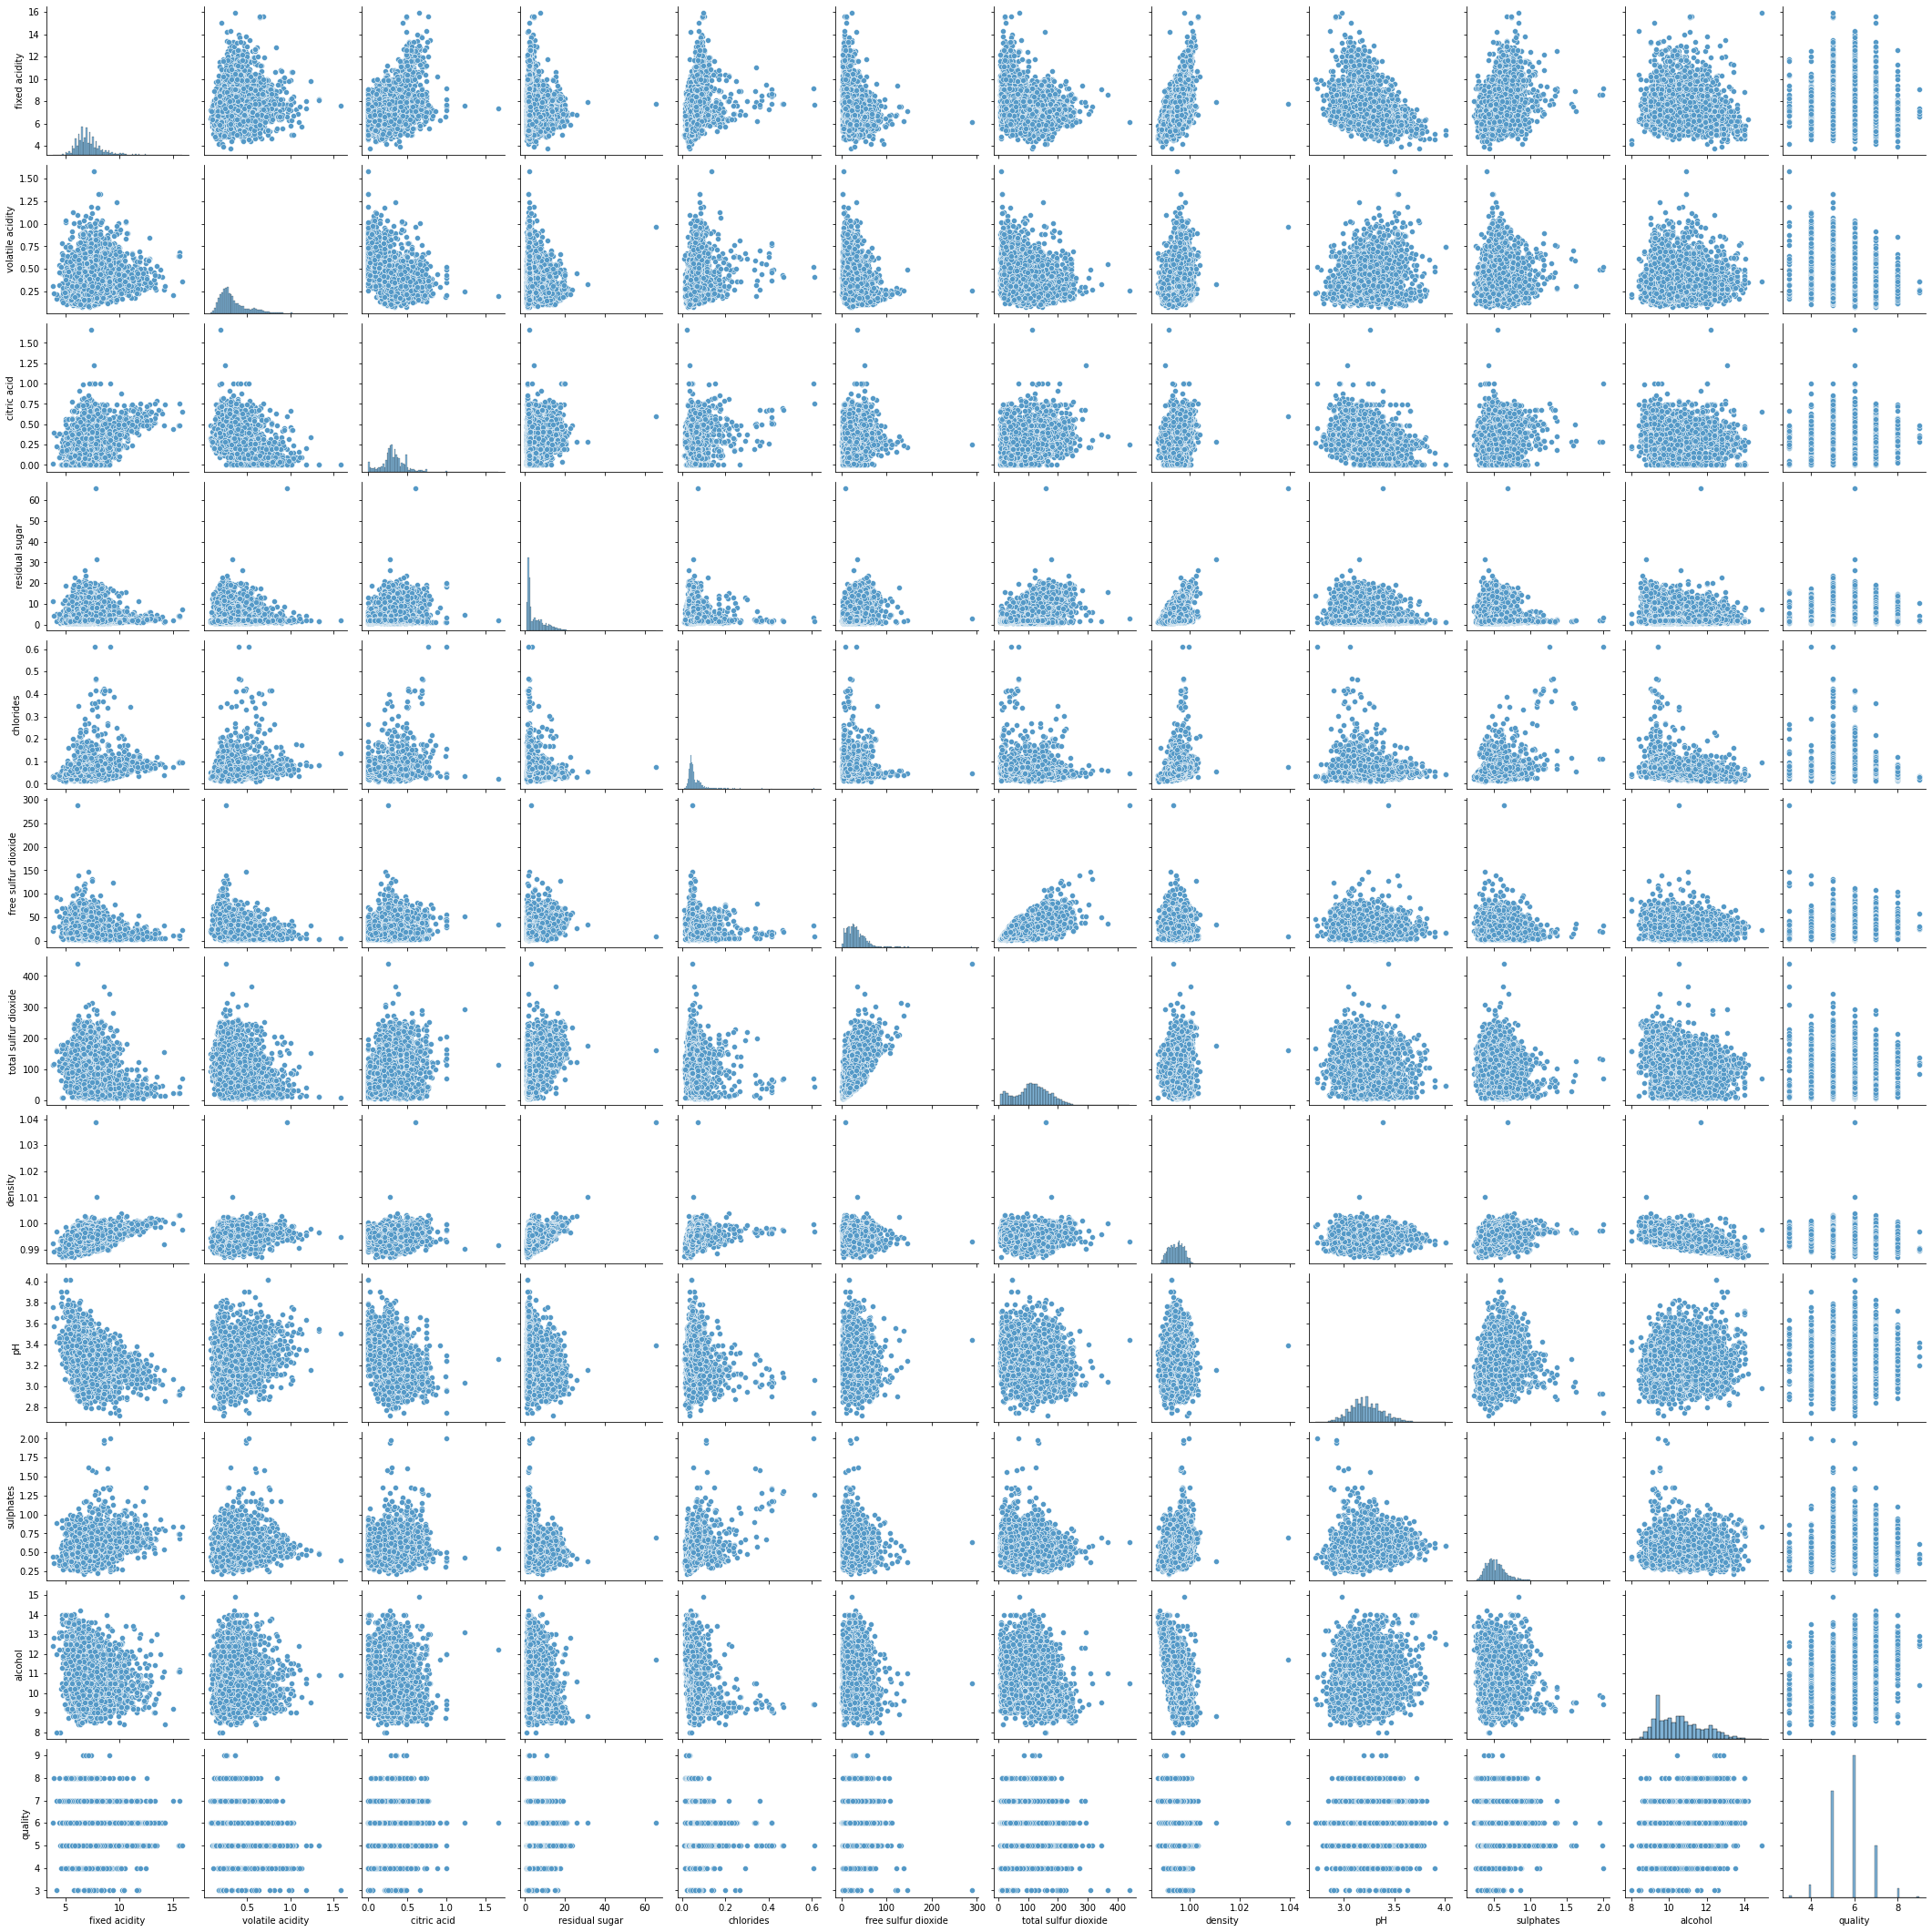

In [241]:
f =sns.pairplot(data.drop(columns=['type'],axis =1))
plt.show()

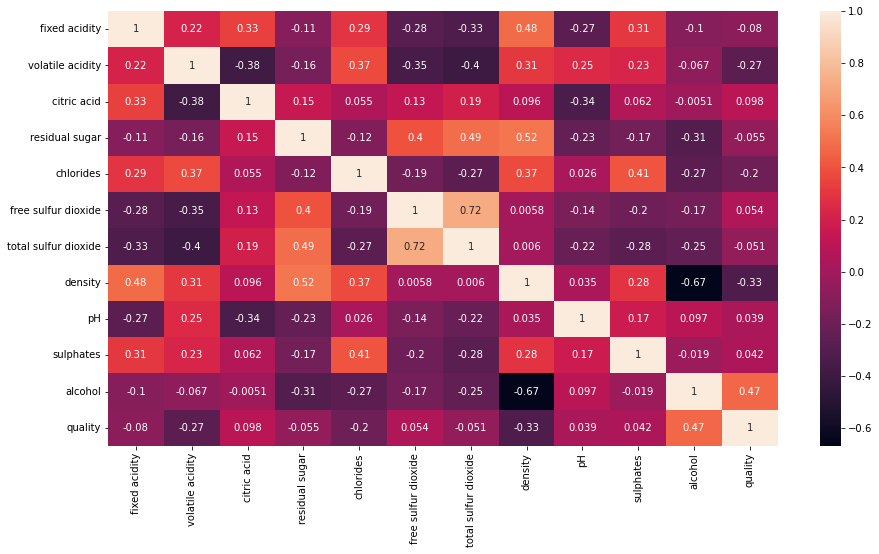

In [242]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(columns=['type'],axis=1).corr(),annot=True)
plt.show()

From above heat map it it clear there presents weak and moderate correlation among variables

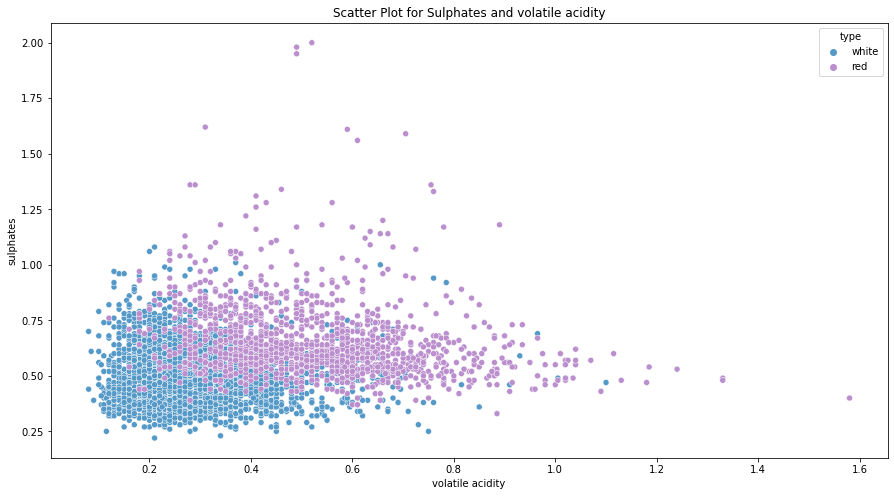

In [243]:
plt.figure(figsize=(15,8))
plt.title("Scatter Plot for Sulphates and volatile acidity")
sns.scatterplot(x= data['volatile acidity'], y= data['sulphates'], hue=data['type'])
plt.show()

From above plots it is clear that generally sulphates value is higher in red wine and less in white wine.

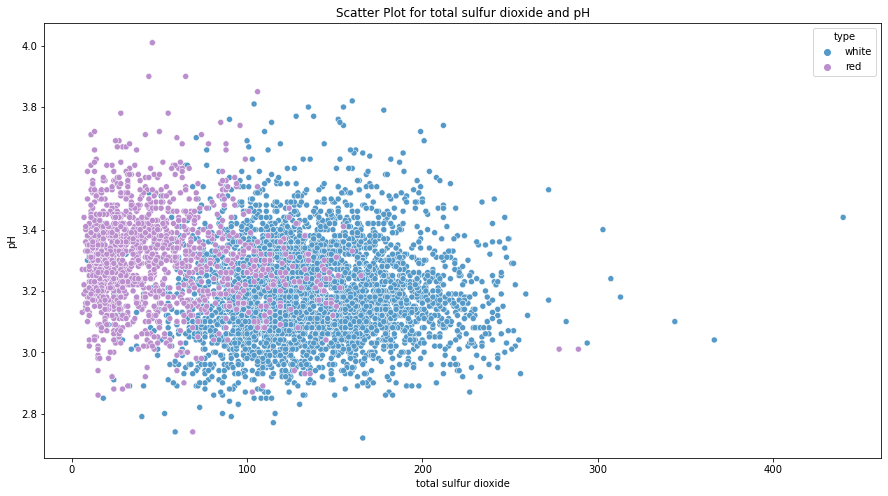

In [244]:
plt.figure(figsize=(15,8))
plt.title("Scatter Plot for total sulfur dioxide and pH")
sns.scatterplot(x= data['total sulfur dioxide'], y= data['pH'], hue=data['type'])
plt.show()

ph values appear to same in case of red or white wine, but total sulphur dioxide vlaue is very much higher in white wine

# Inferences

Normality test for the numerical variables

Null hypothesis Ho: means are same or feature is normally distributed

Alternative hypothesis H1: featue is not normally distributed

In [200]:
data.iloc[:,1:]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5290,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
5291,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
5292,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
5293,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [201]:
data.shape

(5295, 13)

In [204]:
data_random =data.sample(n=470,random_state=10) # taking 470 random sample, as p value is not accurate for sample >500


In [205]:
data_random['type'].value_counts()/len(data_random)

white    0.776596
red      0.223404
Name: type, dtype: float64

In [206]:
data['type'].value_counts()/len(data)

white    0.744476
red      0.255524
Name: type, dtype: float64

In [207]:
for col in data_random.iloc[:,1:].columns: # shapirot normality test
    print(col,'-',  stats.shapiro(data_random[col]))

fixed acidity - ShapiroResult(statistic=0.8464365005493164, pvalue=5.6931315543105174e-21)
volatile acidity - ShapiroResult(statistic=0.8661397099494934, pvalue=1.2015982299584443e-19)
citric acid - ShapiroResult(statistic=0.9581062197685242, pvalue=2.675189514356191e-10)
residual sugar - ShapiroResult(statistic=0.8400428891181946, pvalue=2.254025365889911e-21)
chlorides - ShapiroResult(statistic=0.6241704225540161, pvalue=9.577037415979816e-31)
free sulfur dioxide - ShapiroResult(statistic=0.9487901926040649, pvalue=1.1174061675944813e-11)
total sulfur dioxide - ShapiroResult(statistic=0.9842427968978882, pvalue=5.5666583648417145e-05)
density - ShapiroResult(statistic=0.986562967300415, pvalue=0.0002482508425600827)
pH - ShapiroResult(statistic=0.9812537431716919, pvalue=9.309901543019805e-06)
sulphates - ShapiroResult(statistic=0.9425499439239502, pvalue=1.6370079120378578e-12)
alcohol - ShapiroResult(statistic=0.9605218172073364, pvalue=6.552439146823019e-10)
quality - ShapiroResul

No variable is normally distributed here as p value is less than 0.05 (level of signifigance), rejecting hull hypothesis
, meaning the above variables do not follow normal distribution

In [208]:
for col in data_random.iloc[:,1:].columns: # jarque bera normality test
    print(col,'-',  stats.jarque_bera(data_random[col]))

fixed acidity - Jarque_beraResult(statistic=1576.800761752065, pvalue=0.0)
volatile acidity - Jarque_beraResult(statistic=340.18425321614995, pvalue=0.0)
citric acid - Jarque_beraResult(statistic=95.78380636890263, pvalue=0.0)
residual sugar - Jarque_beraResult(statistic=103.12782837951605, pvalue=0.0)
chlorides - Jarque_beraResult(statistic=13861.915812360976, pvalue=0.0)
free sulfur dioxide - Jarque_beraResult(statistic=142.15753695025177, pvalue=0.0)
total sulfur dioxide - Jarque_beraResult(statistic=5.178214449898965, pvalue=0.07508704601156302)
density - Jarque_beraResult(statistic=5.853818499802956, pvalue=0.053562330352976195)
pH - Jarque_beraResult(statistic=28.73131038992072, pvalue=5.768663681182673e-07)
sulphates - Jarque_beraResult(statistic=337.1712322034524, pvalue=0.0)
alcohol - Jarque_beraResult(statistic=27.20796279289417, pvalue=1.2355659960716636e-06)
quality - Jarque_beraResult(statistic=12.507911054007428, pvalue=0.0019228332549996452)


the p value for the desnisty and total sulfur dioxide is littble bit higher than 0.05 , so these feature follows normal
distribution according to jarque bera test and rest are not normally distributed. However, shapiro test conveys that all
featues do not follow normal distribution. Making shapiro test as baseline we are concluding all feature are not normally distributed. To carry out our analysis further we would go ahead for the non parametric test

### Checking quality of white and red wine is same or different?

In [210]:
def prepareKruskal(numericSeriesName): # function for the preparation of kruskal  (non parametric test of annova)
    public= data[data['type']=='white'][numericSeriesName]
    private = data[data['type']=='red'][numericSeriesName]
    return (public,private)

stats.kruskal(prepareKruskal('quality')[0],prepareKruskal('quality')[1])

KruskalResult(statistic=76.38146742375316, pvalue=2.3383546383411038e-18)

In [211]:
# it means quality of red and white wine is different
pd.pivot_table(data[['type','quality']],index ='type',values='quality',aggfunc='mean')
# quality of white wine is llite bit better than red wine

,quality
type,
red,5.623799
white,5.855150


Kruskal test and mean values of quality for type variable conveys that quality of white wine is little bit better than red wine

### Compairing alcohol content of white and red wine

In [212]:
def prepareKruskal(numericSeriesName): # function for the preparation of kruskal  (non parametric test of annova)
    public= data[data['type']=='white'][numericSeriesName]
    private = data[data['type']=='red'][numericSeriesName]
    return (public,private)

stats.kruskal(prepareKruskal('alcohol')[0],prepareKruskal('alcohol')[1])

KruskalResult(statistic=14.65371165162567, pvalue=0.00012918000739498497)

In [214]:

pd.pivot_table(data[['type','alcohol']],index ='type',values='alcohol',aggfunc='mean')

,alcohol
type,
red,10.428394
white,10.591945


Kruskal test confirms that alcohol content is not same for both wine, actually white conatins more alcohol

### Spearman test for the correlation

In [132]:
from scipy.stats import spearmanr

The distribution follows by variables are not normal , we go ahead with the non parametric test Spearman to find the significant 
correlation amonng the numeric variable 

In [218]:
columns_list = list(data.drop(columns=['type'],axis=1).columns) #  taking numeric columns from the data 
all_combination =list(combinations(columns_list,2)) # taking all possible combination
print("there are total 66 combination possible from 12 numrical variables",len(all_combination))
print(all_combination)

there are total 66 combination possible from 12 numrical variables 66
[('fixed acidity', 'volatile acidity'), ('fixed acidity', 'citric acid'), ('fixed acidity', 'residual sugar'), ('fixed acidity', 'chlorides'), ('fixed acidity', 'free sulfur dioxide'), ('fixed acidity', 'total sulfur dioxide'), ('fixed acidity', 'density'), ('fixed acidity', 'pH'), ('fixed acidity', 'sulphates'), ('fixed acidity', 'alcohol'), ('fixed acidity', 'quality'), ('volatile acidity', 'citric acid'), ('volatile acidity', 'residual sugar'), ('volatile acidity', 'chlorides'), ('volatile acidity', 'free sulfur dioxide'), ('volatile acidity', 'total sulfur dioxide'), ('volatile acidity', 'density'), ('volatile acidity', 'pH'), ('volatile acidity', 'sulphates'), ('volatile acidity', 'alcohol'), ('volatile acidity', 'quality'), ('citric acid', 'residual sugar'), ('citric acid', 'chlorides'), ('citric acid', 'free sulfur dioxide'), ('citric acid', 'total sulfur dioxide'), ('citric acid', 'density'), ('citric acid', 

In [219]:
associated_list =[] # list to keep the record of combination
temp_list =[]
for i in range( len(all_combination)):
    name1 = all_combination[i][0]
    name2 = all_combination[i][1]
    #print('Test for {}, {}'.format(name1,name2))
    stats , pValue = spearmanr(data[name1],data[name2]) # spearmn test 
    if pValue<0.025: # checking p value , level of signifigance =0.05, for two tail test it is 0.025
        temp_list = list(all_combination[i])
        temp_list.append(pValue)
        temp_list.append(stats)
        associated_list.append(temp_list)

In [220]:
# convertingthe associated_list in the Data Frame
dataCorrelation = pd.DataFrame(associated_list, columns=['var1','var2','pValue','correlation']) 
dataCorrelation.sort_values(by = 'correlation', ascending=False)

,var1,var2,pValue,correlation
41,free sulfur dioxide,total sulfur dioxide,0.000000e+00,0.742496
36,chlorides,density,0.000000e+00,0.609518
30,residual sugar,density,0.000000e+00,0.492286
58,alcohol,quality,2.721080e-304,0.480644
5,fixed acidity,density,8.180821e-264,0.451080
11,volatile acidity,chlorides,4.005349e-241,0.433133
29,residual sugar,total sulfur dioxide,8.367085e-237,0.429590
38,chlorides,sulphates,5.467773e-178,0.376532
28,residual sugar,free sulfur dioxide,3.329695e-166,0.364612
2,fixed acidity,chlorides,2.988323e-163,0.361544


Above table concludes that 

free sulphur dioxide and total sulphur dioxide are correlated

chlorides and density

density and residual sugar

alcohol and quality are positively and moderately correlated

density and qualtiy are negatively and moderately correlated

residual sugar and quality are negatively and weakly correlated

chlorides and quality are negatively and weakly correlated

volatile acidity and qulaity are negatively and weakly correlated



In other words to have good qulaity wine we need to have
large percentage volumne of alcohol and chlorides while the percentage of volatile acidity, residual sugar,
density, fixed acidity	, total sulphur dioxide should be less


# Thank you